## CS 449 Deep Learning Homework 1

There are 20 points possible for this assignment. The due date for this assignment is shown on Canvas.

## Academic Integrity

While the project and some future assignments may be completed in groups,
**this assignment must be completed alone**.  Do not submit someone else's work
as your own, and do not allow someone else to submit your work as their own.
Do not use ChatGPT or other LLMs for this assignment.  If we find sufficiently
suspicious similarities between your answers and those of another student, you
may both be reported for a suspected violation.  If you're unsure of the
academic integrity policies, ask for help; we can help you avoid breaking the
rules, but we can't un-report a suspected violation.

By submitting this assignment, you agree to these rules, and understand that
there may be severe consequences for violating them.


## Important Instructions

While we provide this GitHub repo for you, your work must be uploaded to **Canvas**
for us to grade it. You must upload two files

1. your final `hw1.ipynb` notebook with outputs saved. If we run your notebook
  from scratch, it should produce an output identical to your PDF. You can edit
  your notebook however you want (on Colab, on your local machine, somewhere
  else); just upload the latest version of it to Canvas.

1. a `hw1.pdf` printout of the completed notebook that shows all your answers.
  If you open Jupyter Notebook locally, the `File > Download as > PDF via LaTeX (.pdf)`
  often produces the best PDFs, but as long as we can read all your answers,
  any approach is fine.
  [This blog post suggests a few options.](https://mljar.com/blog/jupyter-notebook-pdf/)

See the `README.md` provided with this assignment for the full instructions.


# Part 1: Loss functions (8 points)

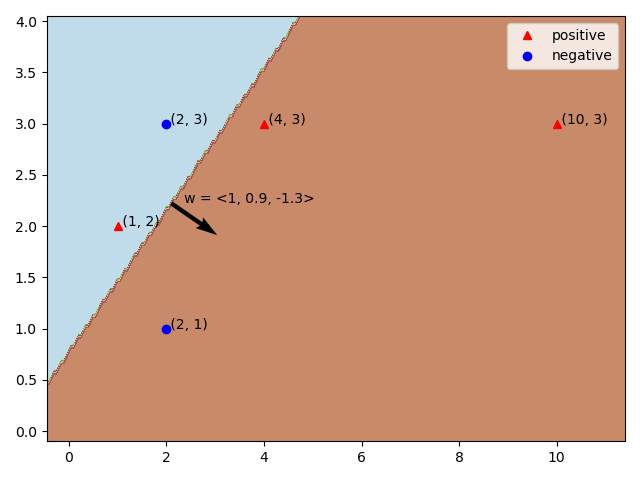

Consider the linear classifier with the weights and decision boundary above. Define $g({\bf X}) =  {\bf Xw}$. We'll define our classification prediction $h({\bf X}) = \text{sign}(g({\bf X}))$. You can assume the sign (not sine) function is [implemented as in numpy](https://numpy.org/doc/stable/reference/generated/numpy.sign.html). Using the parameters $\mathbf{w} = \langle 1, 0.9, -1.3 \rangle$ shown above, we can calculate $g(X)$ and $h(X)$ as:

$\begin{array}{c r r r}
{\bf X} & y & g({\bf X}) & h({\bf X}) \\
\hline
(1, 2) &  1  & -0.7 &  -1 \\
(2, 1) &  -1 & 1.5  &  1   \\
(2, 3) &  -1 & -1.1 &  -1  \\
(4, 3) &  1  & 0.7  &  1   \\
(10, 3)&  1  & 6.1  &  1 
\end{array}$

Right now, the classifier gets 60% accuracy. We want to think about how different loss functions could help the model improve.

In class, we've discussed the perceptron loss and mean squared error as ways of evaluating the quality of model predictions. First, read up on [Hinge loss](https://en.wikipedia.org/wiki/Hinge_loss) and [Binary Cross Entropy loss](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression) to understand how those work. We include definitions below, but it'll be helpful to understand the "margin" aspect of hinge loss and the probabilistic interpretation of BCE loss.

Using our $g({\bf X})$ definition above, we can define each loss as the following:

1. Perceptron (zero-one) loss:

$L(x, y) = \begin{cases}
0 & \text{if } y \cdot g({\bf x}) > 0 \\
1 & \text{otherwise} 
\end{cases} \\[2em]$

2. Squared error loss:

$L(x, y) = (y - g({\bf x}))^2 \\[2em]$

3. Binary cross-entropy loss (written in an atypical way):

$L(x, y) = \begin{cases}
\ln\left(1 + \exp(-g({\bf x}))\right) & \text{ if } y > 0 \\
\ln\left(1 + \exp(g({\bf x}))\right) & \text{ if } y < 0
\end{cases} \\[2em]$

4. Hinge loss:

$L(x, y) = \max\left(0, 1 - y \cdot g({\bf x})\right) \\[1em]$

For each loss, answer the following questions. You must provide an explanation for full points.

 - a. For this loss, which point(s) have the highest loss value? Why?

 - b. For this loss, which point(s) have the lowest loss value? Why?

 - c. With this dataset and loss, is it possible to find a different set of model parameters ${\bf w'}$ that would have a lower total loss? Don't calculate the loss for any specific ${\bf w'}$ values; just look at the plot and use your intuition. You may answer "Yes", "No", or "Maybe":
    - If you answer "Yes", give a general description of what the new decision boundary would look like and why that would decrease the loss (e.g., "if you rotated the current boundary clockwise, then ...").
    - If you answer "No", give a general argument for why there is no decision boundary that could decrease the loss.
    - If you answer "Maybe", give a general description of a new decision boundary that *might* decrease the loss, but it's hard to tell without doing the calculations. Also, provide a general argument for why there's no decision boundary that *obviously* decreases the loss.

 - d. Is this loss function a good choice for training a *multilayer* perceptron on a binary classification task? Why or why not?

## *Please add your answers into the structure below. You shouldn't need to write or run code for these answers.*

1. Perceptron loss

  a. Points (2, 1) and (1, 2) will have the highest loss because they are the only ones that are being mispredicted. In essence the Perceptron loss function compares the sign of the label and the prediction and if they match it outputs 0 otherwise 1.

  b. (2, 3), (4, 3) and (10, 3) will have the lowest loss because they are the ones that are correctly predicted. As described in part a. Perceptron loss will output 1 when both the label and the prediction have the same sign otherwise 0.

  c. Yes it is possible to move to decision boundary and lower the loss. A decision boundary that is parallel to the y-axis and passes between the points (2, 1) and (4, 3) would improve the loss function. The reason is simply because now the point (2, 1) will be correctly predicted. The correct predictions would be 80% and the perceptron will now output 0 for the point (2, 1), because the label and the prediction will have the same sign. The perceptron loss function will to drop to 2 from 3 to be precise. 

  d. It is well enough because using 2 perceptrons and the Perceptron Loss function the given dataset can be classified with 100% accuracy. However, for more complicated problems/datasets were the solutions are not as clear. Its not a good choice because the gradient wouldn't exist everywhere of the function. So we wouldn't be able to use any kind of differentiation technique to update the weights such as backprop. Thus it doesn't provide information about how confident the model is in its predictions. Making it challenging(maybe impossible) to make smarter updated on its weights. 


2. Squared error loss

  a. The point (10, 3) has the highest loss simply because it is the point that is furthest away from decision boundary. Even though the point is classified correctly! 

  b. The point (2, 3) has the lowest loss because it is being correctly classified and |g(x)|= |g((2,3))| outputs the values that is nearest to 1. 

  c. Maybe, its hard to tell because the Squared Loss function is both determined by the distance of the point to the boundary and the correctness of classification. However, the distance of the point to the boundary can possible have an infinite effect, where correctness of classification will only increase the absolute value of the squared term by 1 in the case of misclasification. Hence, I can not be sure without calculating.   

  d. Its not a good choice for binary classification, due to the fact that loss increases as the data point is further away from a decision boundary. So it would put a lot weight to the outliers. Which does not align well for the binary classification task in which we mainly care about the correctness of the classification rather than minimizing the distances between decision boundaries and samples/data points. 


3. Binary cross entropy loss

  a. Point (2, 1) has the highest loss because its being mispredicted with the highest confidence. Binary cross entropy(BCE) not only measures correct classification but also measures the confidence of the model in a given data point. In this example the model will have higher confidence if its predicting the correct sign with a high value, and a lower loss. So in a sense BCE not only wants the model to correctly classify the point, but also classify it with high confidence(a high g(x)). 

  b. The point (10, 3) has the lowest loss because its being labeled correctly with the highest confidence. Thinking about this behavior from a probabilistic perspective; BCE wants the model to classify the point correctly with a high probability or with less uncertainty. 

  c. Maybe, I'm somewhat confident that the line that I described for part 1.1.c will have an overall lower loss, the amount of correctly classified labels increase so the loss value for point (2, 1) decrease. The loss for (1, 2) may slightly increase, but fact that the point (2, 1) is now classified correctly should have stronger weight on the total loss.

  d. Yes it is a really great choice. First of all it aligns with the necessities for a good loss function in MLP setting. The gradient is defined everywhere, and its non-linear. It is designed to work with binary input, and it doesn't only measure if the model is correctly labeling it also measures how confident the model is on its predictions. So providing a probabilistic view on the model's predictions is invaluable to develop/apply guided weight updates. 



4. Hinge loss

  a. The highest loss is at the point (2, 1). Its because its misclassified and it has the highest g(x) value among other points that are misclassified and the Hinge loss grows linearly when the prediction and label have opposite signs.

  b. The lowest loss are at points: (2, 3) and (10, 3). Whenever `g(x)` is greater than or equal to 1 and has the same sign with its corresponding  `y` Hinge loss will output 0. So when the prediction for point x is correct, then `g(x) >= 1` is enough margin.

  c. Maybe, like in part 1.3.c, I'm somewhat confident that it will decrease again using the decision boundary that I have described in part 1.1.c . With that line point (2,1) will be classified correctly. Which currently has the highest loss so that will get better, other values will also get adjusted but I believe that the overall loss could be better.

  d. It could be used as a loss function in MLP because again its non-linear and gradient is defined everywhere, but I would argue that its not as good Binary Cross Entropy Loss, because it will only penalize the model harshly when its misclassifying with high confidence, but it will not be (highly)favoring cases when the model is doing correct predictions with high confidence. However, its still better than preceptron loss because it does take in to account the cases when the model is highly wrong in its predictions and when it is slightly confident on its correct predictions.

In [29]:
""" Calculations for Part I """

import numpy as np

w = [1, 0.9, -1.3]
data_points = [[1,2], [2,1], [2,3], [4,3], [10, 3]]
y = [1, -1, -1, 1, 1]

def g(x):
    return np.dot(np.concatenate(([1],x)), w)

def binary_cross_entropy(x, y):
    if y > 0:
        return np.log(1+np.exp(-g(x)))
    return np.log(1+np.exp(g(x)))

def hinge_loss(x, y):
    return max(0, 1 - y*g(x))

def part_c_calc():
    print("Binary cross entropy values for Part C")
    for x_i, y_i in zip(data_points, y):
        print(f"x: {x_i}, y: {y_i}, g(x): {g(x_i)}, loss: {binary_cross_entropy(x_i, y_i)}")

def part_d_calc():
    print("Hinge loss values for Part D")
    for x_i, y_i in zip(data_points, y):
        print(f"x: {x_i}, y: {y_i}, g(x): {g(x_i)}, loss: {hinge_loss(x_i, y_i)}")

part_c_calc()
print()
part_d_calc()



Binary cross entropy values for Part C
x: [1, 2], y: 1, g(x): -0.7000000000000002, loss: 1.1031860488854581
x: [2, 1], y: -1, g(x): 1.4999999999999998, loss: 1.7014132779827522
x: [2, 3], y: -1, g(x): -1.1000000000000005, loss: 0.28733532511543075
x: [4, 3], y: 1, g(x): 0.6999999999999993, loss: 0.4031860488854581
x: [10, 3], y: 1, g(x): 6.1, loss: 0.0022403562462494655

Hinge loss values for Part D
x: [1, 2], y: 1, g(x): -0.7000000000000002, loss: 1.7000000000000002
x: [2, 1], y: -1, g(x): 1.4999999999999998, loss: 2.5
x: [2, 3], y: -1, g(x): -1.1000000000000005, loss: 0
x: [4, 3], y: 1, g(x): 0.6999999999999993, loss: 0.3000000000000007
x: [10, 3], y: 1, g(x): 6.1, loss: 0


# Part 2: Experiments with Pretraining (12 points)

If you are having difficulty installing pytorch locally, please [follow the instructions here](https://pytorch.org/get-started/locally/) or in the `README.md`.

Before you start editing the code, please read through the cells below to get a sense of how we're setting up these experiments. You're welcome to take notes. Then, you can run all the cells. The questions you need to answer are found at the bottom of the notebook. 

In [2]:
# Choose basedir as either local or hosted directory
import os
if "COLAB_BACKEND_VERSION" in os.environ:
    base_dir = "/content"
else:
    base_dir = os.getcwd()
%cd $base_dir

import torch
print(torch.__version__)
import numpy as np

import copy
import random

from collections import defaultdict
from sklearn.model_selection import train_test_split

need_to_install = False
try:
    from lectures.utils.plotting import *  # see plotting.py for plotting utilities
    
except ModuleNotFoundError as e:
    if os.path.isdir(os.path.join(base_dir, "lectures")):
        raise e
    else:
        print("Cloning helper repo")
        !git clone https://github.com/cs449f24/lectures.git lectures/
        %cd $base_dir/lectures/
        !git pull -q origin main
        from utils.plotting import *

/home/murat/NU/CS449/hw1-muratNU
2.4.1


In [3]:
# Create two datasets

def make_multiple_circles(radii, examples_per_ring, std=0.1,):
    """
    A dataset of concentric circles of alternating labels
    """
    assert type(radii) in [list, tuple, np.ndarray]

    X = np.zeros([0, 2])
    y = np.zeros([0,])

    for i, radius in enumerate(radii):
        # Rings alternate as labeled -1 or 1
        y_ = np.ones([examples_per_ring]) * (-1) ** i
        y = np.concatenate([y, y_], axis=0)

        # Create a ring of points with radii centered at radius
        #   but in any random angle from the origin
        r = radius + np.random.normal(0, std, examples_per_ring)
        theta = np.random.uniform(0, 2 * np.pi, examples_per_ring)

        # Convert (r, theta) coordinates to cartesian
        x0 = r * np.sin(theta)
        x1 = r * np.cos(theta)
        x_ = np.stack([x0, x1], axis=1)
        X = np.concatenate([X, x_], axis=0)

    return X, y.astype(int)


def make_spiral(n):
    """
    Yet another spiral dataset
    """
    y0 = np.zeros(n)
    y1 = np.ones(n)
    y = np.concatenate([y0, y1], axis=0).astype(int)
    z = np.concatenate(2 * [np.linspace(0, 4 * np.pi, n)], axis=0)

    x0 = z * np.sin(z + y * np.pi)
    x1 = z * np.cos(z + y * np.pi)
    X = np.stack([x0, x1], axis=1)

    y[y == 0] = -1

    return X, y


def numpy_to_tensor(lst):
    """
    Convert numpy array to torch tensor
    """
    if type(lst) == np.ndarray:
        return torch.tensor(lst).to(dtype=torch.float32)

    else:
        out = [torch.tensor(item).to(dtype=torch.float32) for item in lst]
        return tuple(out)

In [4]:
class HW1Net(torch.nn.Module):
    def __init__(self, layer_sizes=[], activation=torch.tanh):
        """
        Construct a simple neural network.

        Args:
         - layer_sizes: a list or tuple of hidden layer sizes. For example,
                        if layer_sizes = [4, 4], this will be a network
                        with linear layers with dimensions[2, 4], [4, 4], [4, 2]
         - activation:  a torch activation function
        """
        super().__init__()

        input_dims = (2, ) + tuple(layer_sizes)
        output_dims = tuple(layer_sizes) + (2, )
        dims = zip(input_dims, output_dims)

        self.activation = activation
        self.layers = []
        for i, (input_dim, output_dim) in enumerate(dims):
            # Create and initialize the layer
            layer = torch.nn.Linear(input_dim, output_dim)
            torch.nn.init.xavier_uniform_(layer.weight)
            self.layers.append(layer)

            # Register this layer so Pytorch tracks its parameters
            setattr(self, f"layer{i}", layer)

    def forward(self, x):
        n_layers = len(self.layers)
        for i, layer in enumerate(self.layers):
            x = layer(x)
            # Activation on everything but the final layer
            if i + 1 < n_layers:
                x = self.activation(x)

        return x

In [5]:
def run_one_epoch(model, optimizer, X, y, train=True):

    if train:
        model.train()
        optimizer.zero_grad()
    else:
        model.eval()

    output = model(X).squeeze()
    binary_targets = torch.where(y > 0, 1, 0)

    acc = torch.sum(torch.argmax(output, dim=1) == binary_targets) / y.size(0)
    loss = torch.nn.CrossEntropyLoss()(output, binary_targets)
    
    if train:
        loss.backward()
        optimizer.step()

    # Detach tells torch to stop tracking a tensor's gradients
    return acc.detach(), loss.detach()

In [6]:
def pretrain_and_train(pretrain_data, data, **kwargs):

    # Create the model and set up the optimizer
    model = HW1Net(
        layer_sizes=kwargs["layer_sizes"],
        activation=kwargs["activation"],
    )
    optimizer = torch.optim.Adam(model.parameters(), lr=kwargs["learning_rate"])

    # Pretrain the model and save a copy of the pretrained model
    X, y = pretrain_data
    for _ in range(kwargs["n_pretrain_epochs"]):
        run_one_epoch(model, optimizer, X, y)
    pretrained_model = copy.deepcopy(model)

    # Train the model and track its performance over each epoch
    results = defaultdict(list)
    X_train, X_test, y_train, y_test = data
    for i in range(kwargs["n_train_epochs"]):
        train_acc, train_loss = run_one_epoch(
            model, optimizer, X_train, y_train)
        
        test_acc, test_loss = run_one_epoch(
            model, None, X_test, y_test, train=False)

        results["train_acc"].append(train_acc)
        results["test_acc"].append(test_acc)
        results["train_loss"].append(train_loss)
        results["test_loss"].append(test_loss)

    return pretrained_model, model, results

In [7]:
def make_prediction_function(model):
    """
    Our network outputs real-valued logits
    When we make final predictions, those should be +1 or -1
    """
    def predict(X):
        X = numpy_to_tensor(X)
        output = model(X).detach()
        binary_pred = np.argmax(output, axis=1)
        return np.where(binary_pred > 0, 1, -1)

    return predict


def plot_results(pretrained_model, trained_model,
                pretrain_data, data,
                results, title):
    """
    Given a (saved) pretrained model, our final trained model,
        the pretrained data, train and test data,
        and a dictionary of results,

    Build the six-panel figure that you'll use to show off your results.
    """
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 12),
                             constrained_layout=True)

    X_pretrain, y_pretrain = pretrain_data
    X_train, X_test, y_train, y_test = data

    # Top right panel
    ax = axes[0, 1]
    ax.set_title("Pretrained Model on Train Data")
    plot_data(X_train, y_train, ax)
    predict = make_prediction_function(pretrained_model)
    plot_decision_surface(predict, ax.axis(), ax=ax)

    # Top left panel
    ax = axes[0, 0]
    ax.set_title("Pretrained Model on Pretrain Data")
    plot_data(X_pretrain, y_pretrain, ax)
    axes[0, 0].set_ylim(axes[0, 1].get_ylim())
    axes[0, 0].set_xlim(axes[0, 1].get_xlim())
    predict = make_prediction_function(pretrained_model)
    plot_decision_surface(predict, ax.axis(), ax=ax)

    # Middle left panel
    ax = axes[1, 0]
    ax.set_title("Trained Model on Train Data")
    plot_data(X_train, y_train, ax)
    predict = make_prediction_function(trained_model)
    plot_decision_surface(predict, ax.axis(), ax=ax)

    # Middle right panel
    ax = axes[1, 1]
    ax.set_title("Trained Model on Test Data")
    plot_data(X_test, y_test, ax)
    predict = make_prediction_function(trained_model)
    plot_decision_surface(predict, ax.axis(), ax=ax)

    # Bottom left
    ax = axes[2, 0]
    ax.set_title("Loss per Epoch")
    train_loss = results["train_loss"]
    test_loss = results["test_loss"]
    n_epochs = len(train_loss)
    ax.plot(np.arange(n_epochs), train_loss, c='r', label='Train Loss')
    ax.plot(np.arange(n_epochs), test_loss, c='b', label='Test Loss')
    ax.legend(loc="best")
    ymin, ymax = ax.get_ylim()
    ax.set_ylim(ymin, 2 * ymax)

    # Bottom right
    ax = axes[2, 1]
    ax.set_title("Accuracy per Epoch")
    train_acc = results["train_acc"]
    test_acc = results["test_acc"]
    n_epochs = len(train_acc)
    ax.plot(np.arange(n_epochs), train_acc, c='r', label='Train Acc')
    ax.plot(np.arange(n_epochs), test_acc, c='b', label='Test Acc')
    ax.legend(loc="best")
    ax.set_ylim(0, 1.1)

    final_accuracy = np.mean(test_acc[-10:])
    final_accuracy = f"Final mean test acc: {100 * final_accuracy:.1f}%"
    ax.annotate(final_accuracy, xy=(0, 0.1),
                textcoords="data", fontsize=16)

    plt.suptitle(title, fontsize=24)
    plt.show()

In [8]:
def run_experiment(**kwargs):
    """
    Required kwargs:
    - title:                A name for this experiment

    - radii:                radii of rings in the multiple_circles dataset
    - examples_per_ring:    number of examples per ring

    - layer_sizes:          number of nodes per hidden layer in network
    - activation:           activation function for each hidden layer
    - learning_rate:        learning rate for SGD optimization
    - n_pretrain_epochs:    how many epochs to pretrain
    - n_train_epochs:       how many epochs to train
    """
    random.seed(1)
    np.random.seed(1)
    torch.manual_seed(1)

    pretrain_data = make_multiple_circles(
        radii=kwargs['radii'], examples_per_ring=kwargs['examples_per_ring']
    )
    pretrain_data = numpy_to_tensor(pretrain_data)

    # Do not change the number of spiral examples!
    spiral_data = make_spiral(32)
    spiral_data = numpy_to_tensor(train_test_split(*spiral_data, test_size=0.2, random_state=1))

    pretrained_model, trained_model, results = pretrain_and_train(
        pretrain_data, spiral_data, **kwargs)
    

    plot_results(pretrained_model, trained_model,
             pretrain_data, spiral_data,
             results, kwargs["title"])
    

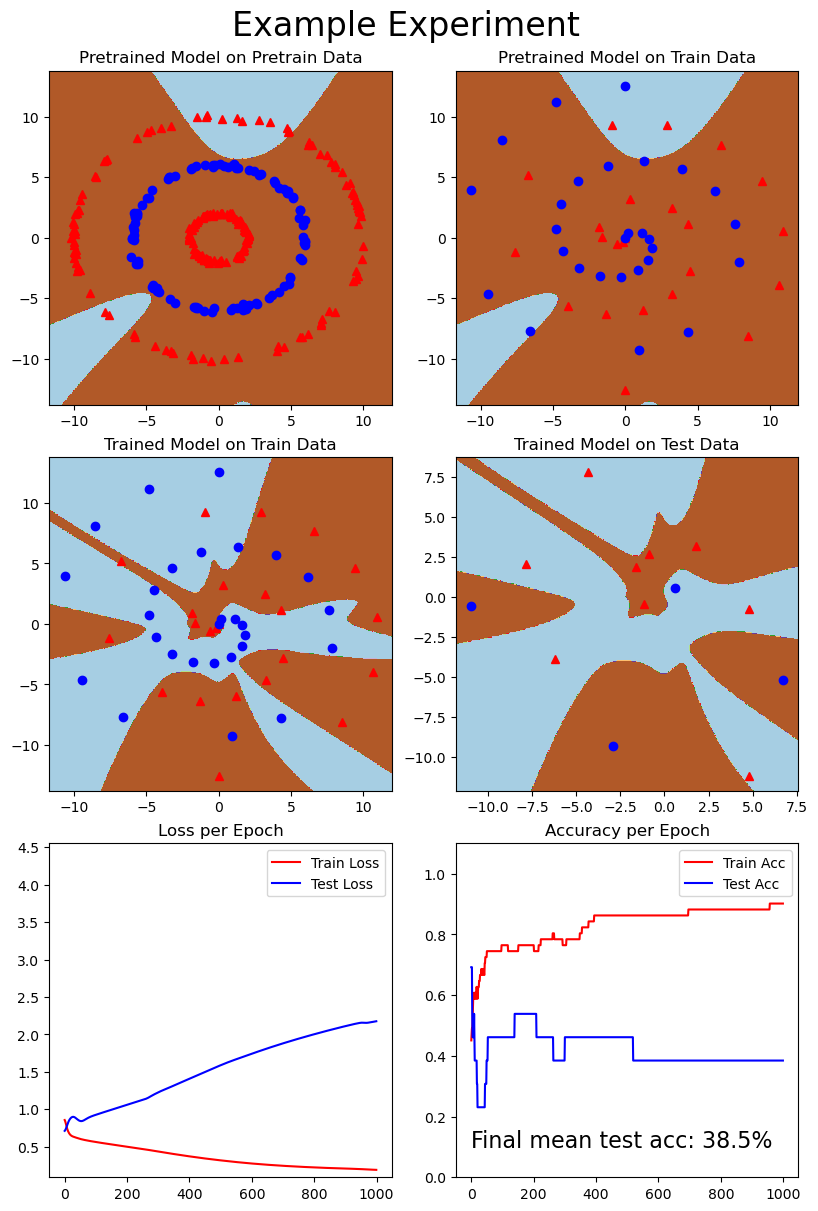

In [19]:
# Example experiment; you should copy this cell several times,
#   edit the kwargs, and save the figure outputs to your notebook.
kwargs = {
    "title": "Example Experiment",
    "radii": (2, 6, 10),
    "examples_per_ring": 100,
    "layer_sizes": [100, 10],
    "activation": torch.tanh,
    "learning_rate": 0.001,
    "n_pretrain_epochs": 100,
    "n_train_epochs": 1000,
}

# can use this for debugging
# kwargs = {
#     "title": "Example Experiment",
#     "radii": (2, 6, 10),
#     "examples_per_ring": 100,
#     "layer_sizes": [100, 10],
#     "activation": torch.tanh,
#     "learning_rate": 0.001,
#     "n_pretrain_epochs": 1,
#     "n_train_epochs": 0,
# }

run_experiment(**kwargs)

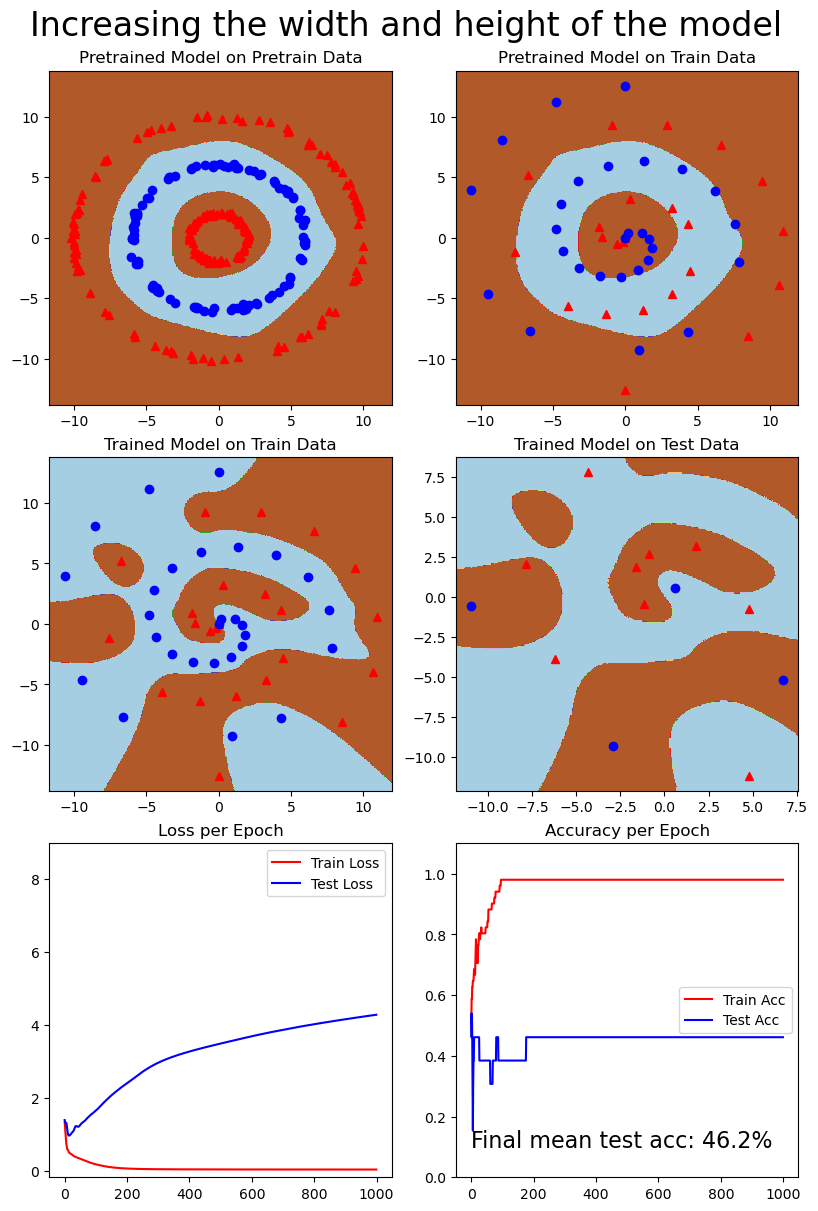

In [24]:

# it is quite clear that the model on the example experiment is overfitting
# there will possibly be many ways to have the model even more overfit.
# one way is to make the model more complex by increasing its width and height

kwargs = {
    "title": "Increasing the width and height of the model",
    "radii": (2, 6, 10),
    "examples_per_ring": 100,
    "layer_sizes": [200, 100, 50, 10],
    "activation": torch.tanh,
    "learning_rate": 0.001,
    "n_pretrain_epochs": 100,
    "n_train_epochs": 1000,
}

run_experiment(**kwargs)


# Here the model quickly memorizes the training set at around the 100th epoch, 
# but the test accuracy is around 46%



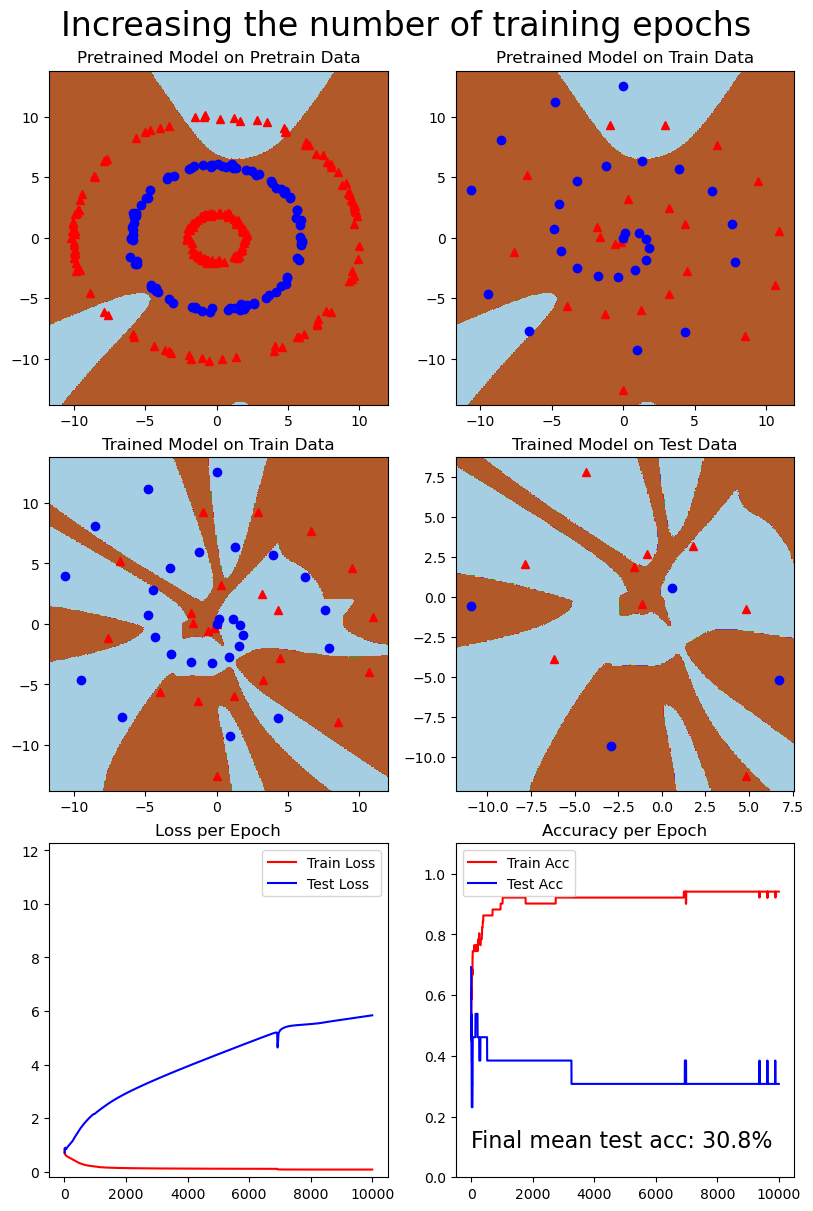

In [25]:
# I expect the model to also overfit when the number of training epochs are increased
# As it will just learn better to memorize the training set. 

kwargs = {
    "title": "Increasing the number of training epochs",
    "radii": (2, 6, 10),
    "examples_per_ring": 100,
    "layer_sizes": [100, 10],
    "activation": torch.tanh,
    "learning_rate": 0.001,
    "n_pretrain_epochs": 100,
    "n_train_epochs": 10000,
}

run_experiment(**kwargs)

# As I have correctly predicted the loss on test set keeps increasing 
# with the number of epochs.


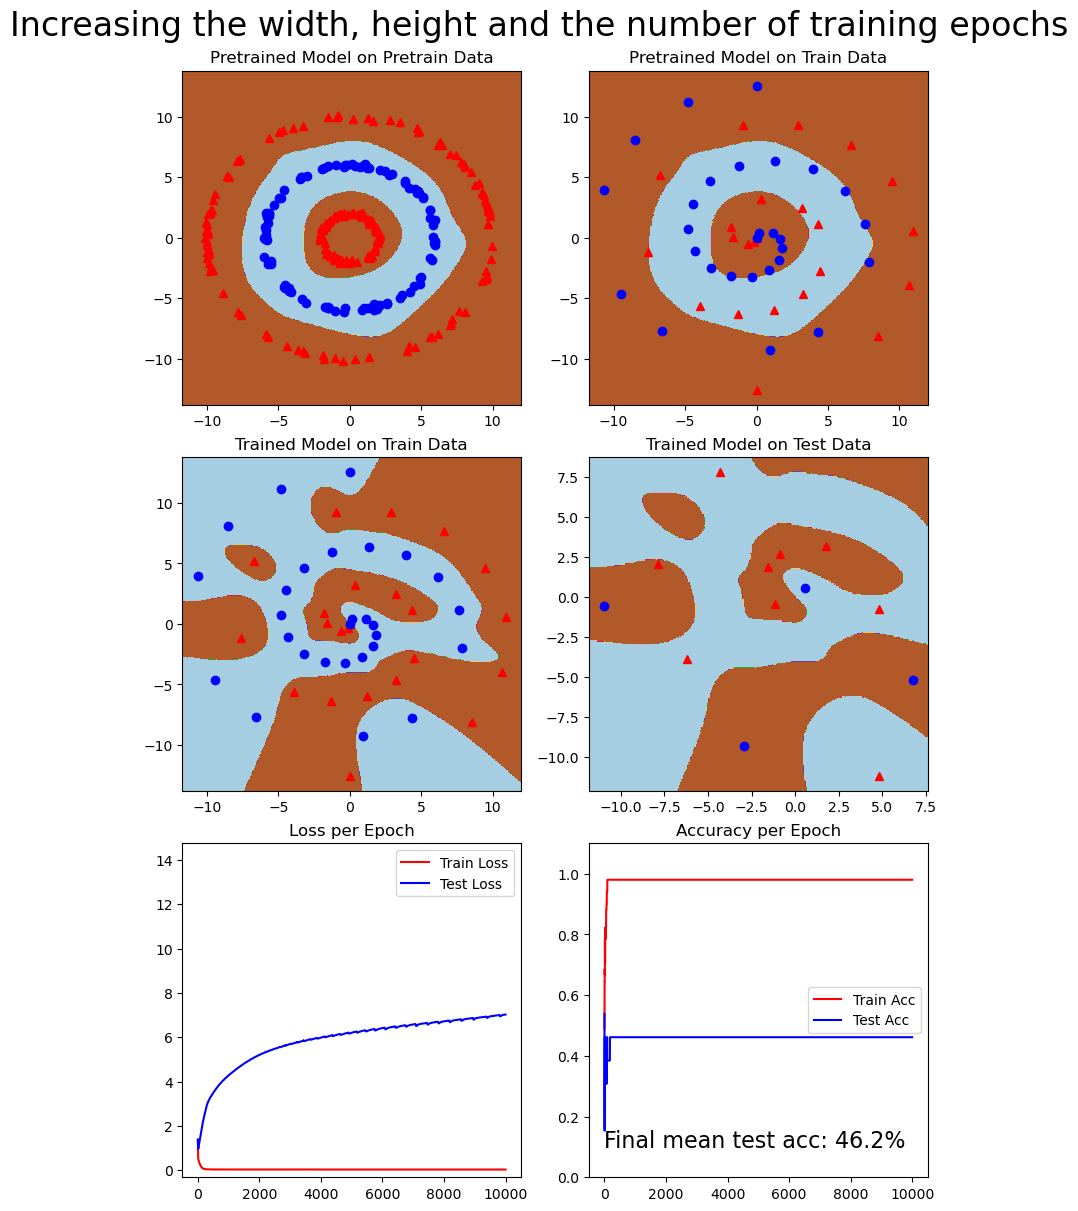

In [27]:
# Now I'm planning to combine a more complex model that executes more training epochs
# I expect the model to even to overfit more, and do worser on the test set.

kwargs = {
    "title": "Increasing the width, height and the number of training epochs",
    "radii": (2, 6, 10),
    "examples_per_ring": 100,
    "layer_sizes": [200, 100, 50, 10],
    "activation": torch.tanh,
    "learning_rate": 0.001,
    "n_pretrain_epochs": 100,
    "n_train_epochs": 10000,
}

run_experiment(**kwargs)

# As I have correctly predicted the loss got even higher when I 
# increased the complexity of the model
# and the number of epochs.


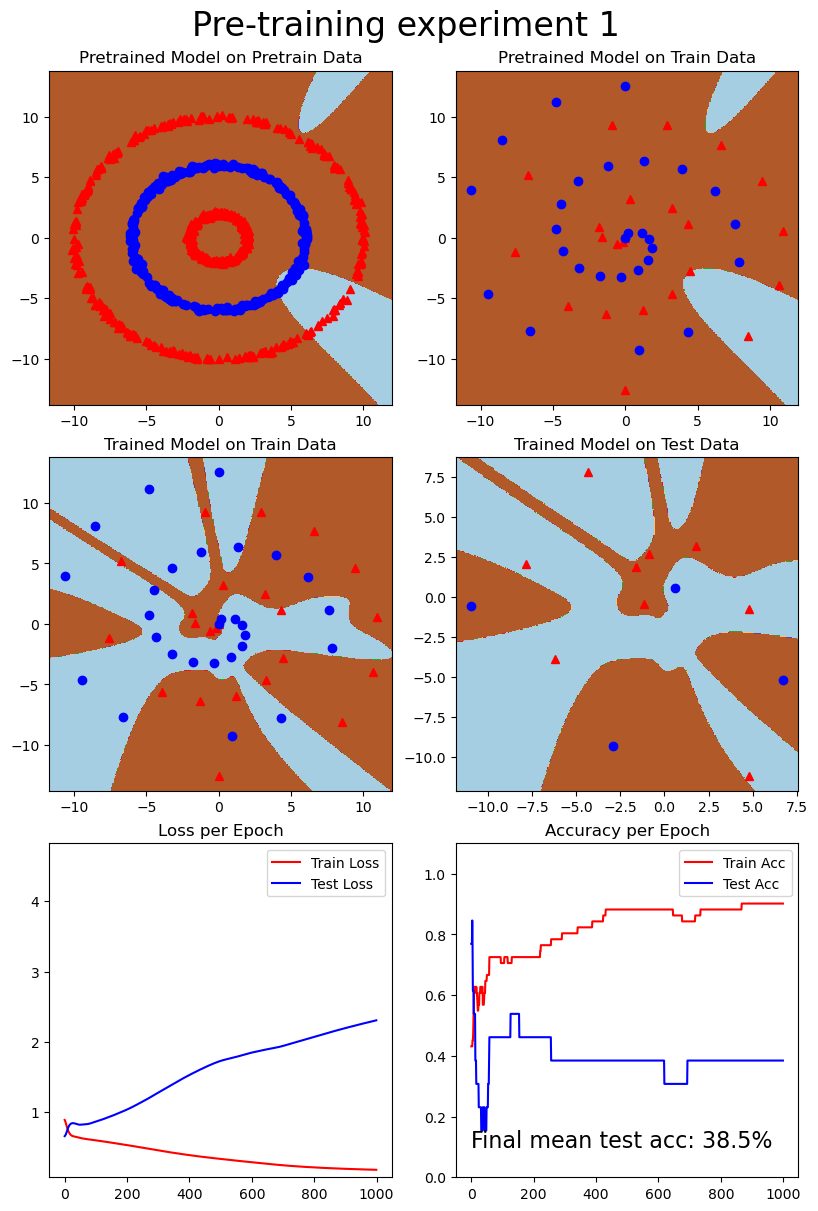

In [12]:
kwargs = {
    "title": "Pre-training Experiment 1",
    "radii": (2, 6, 10),
    "examples_per_ring": 300,
    "layer_sizes": [100, 10],
    "activation": torch.tanh,
    "learning_rate": 0.001,
    "n_pretrain_epochs": 100,
    "n_train_epochs": 1000,
}
run_experiment(**kwargs)

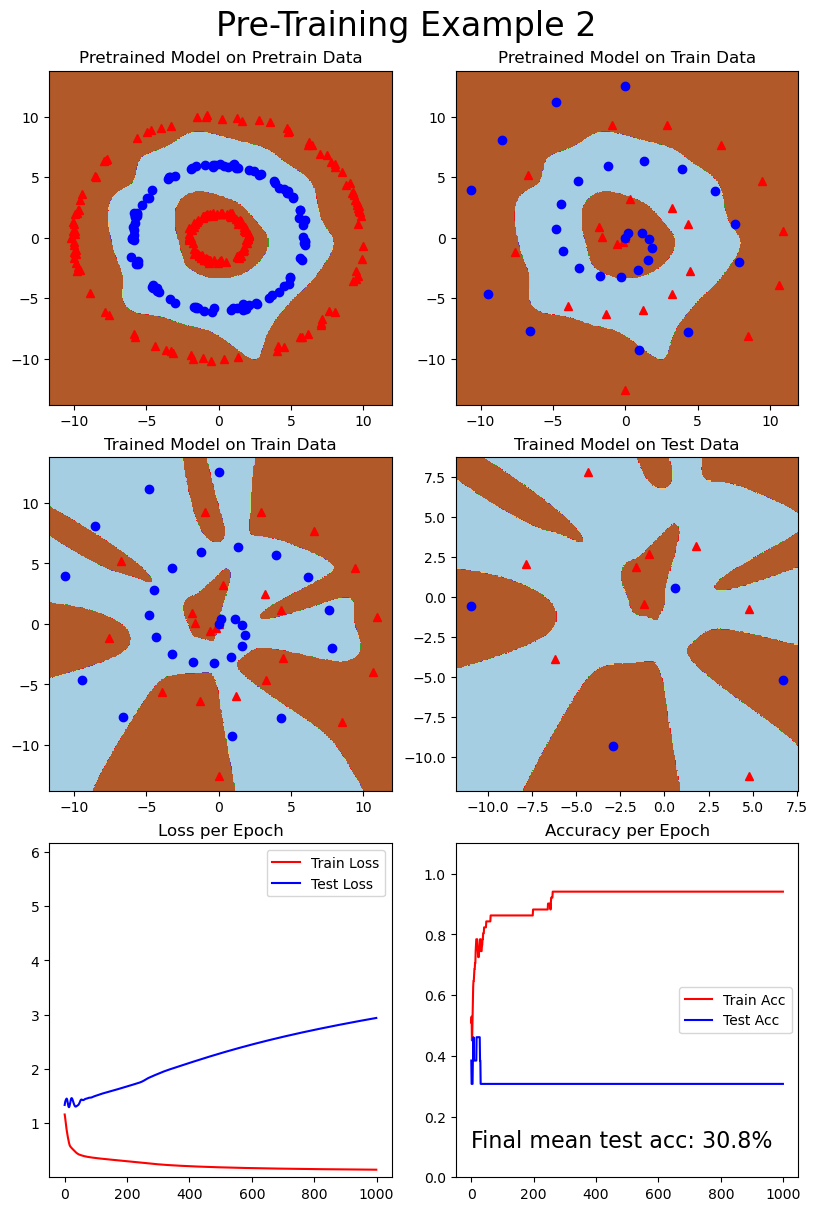

In [16]:
kwargs = {
    "title": "Pre-Training Example 2",
    "radii": (2, 6, 10),
    "examples_per_ring": 100,
    "layer_sizes": [100, 10],
    "activation": torch.tanh,
    "learning_rate": 0.001,
    "n_pretrain_epochs": 500,
    "n_train_epochs": 1000,
}

run_experiment(**kwargs)

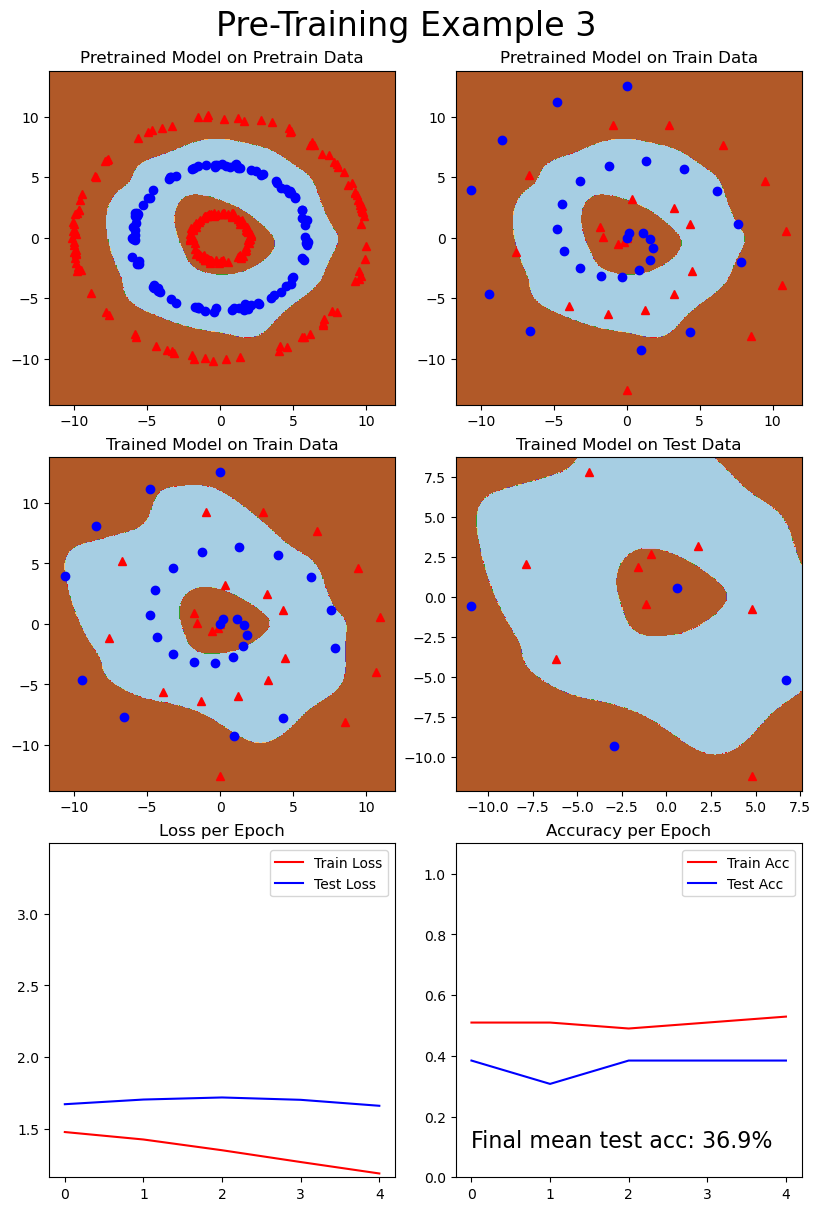

In [48]:
kwargs = {
    "title": "Pre-Training Example 3",
    "radii": (2, 6, 10),
    "examples_per_ring": 100,
    "layer_sizes": [100, 10],
    "activation": torch.tanh,
    "learning_rate": 0.001,
    "n_pretrain_epochs": 500,
    "n_train_epochs": 5,
}

run_experiment(**kwargs)

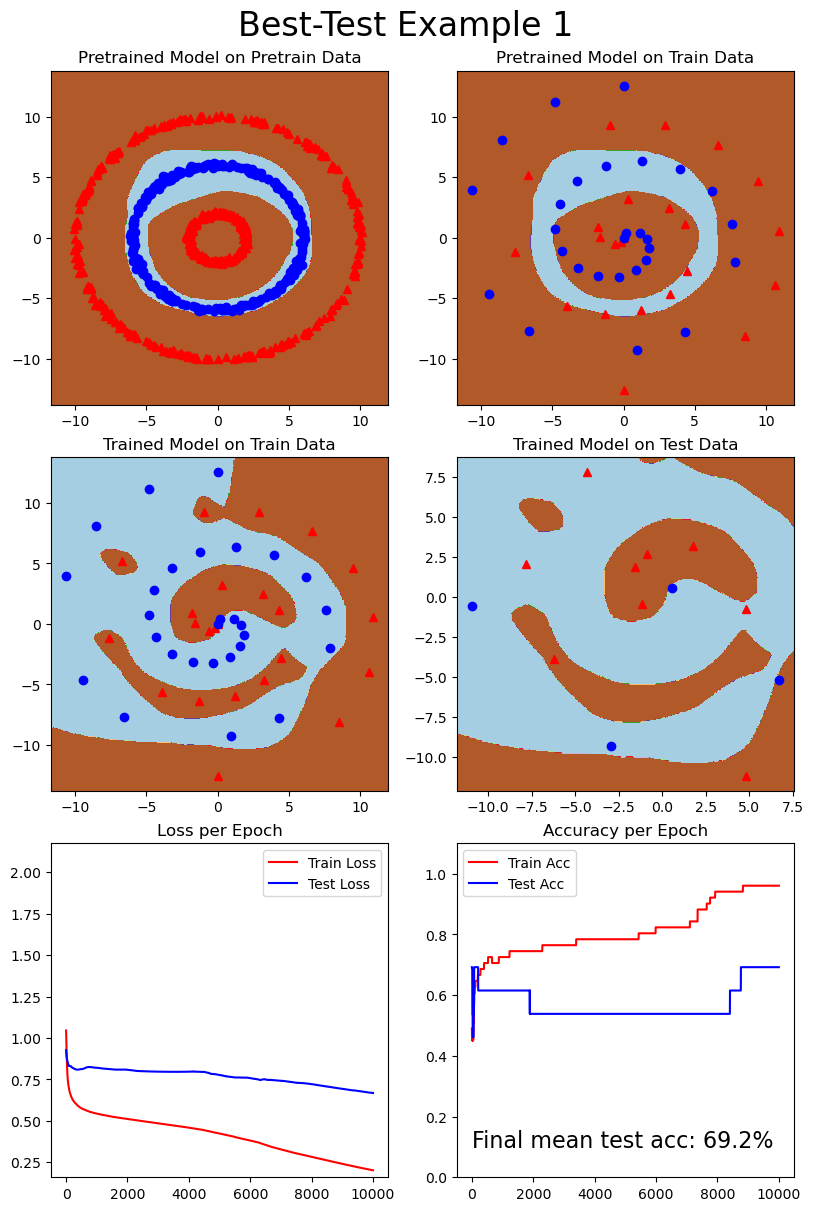

In [112]:
kwargs = {
    "title": "Best-Test Example 1",
    "radii": (2, 6, 10),
    "examples_per_ring": 300,
    "layer_sizes": [200, 100, 10],
    "activation": torch.relu,
    "learning_rate": 0.00001,
    "n_pretrain_epochs": 2000,
    "n_train_epochs": 10000,
}

run_experiment(**kwargs)

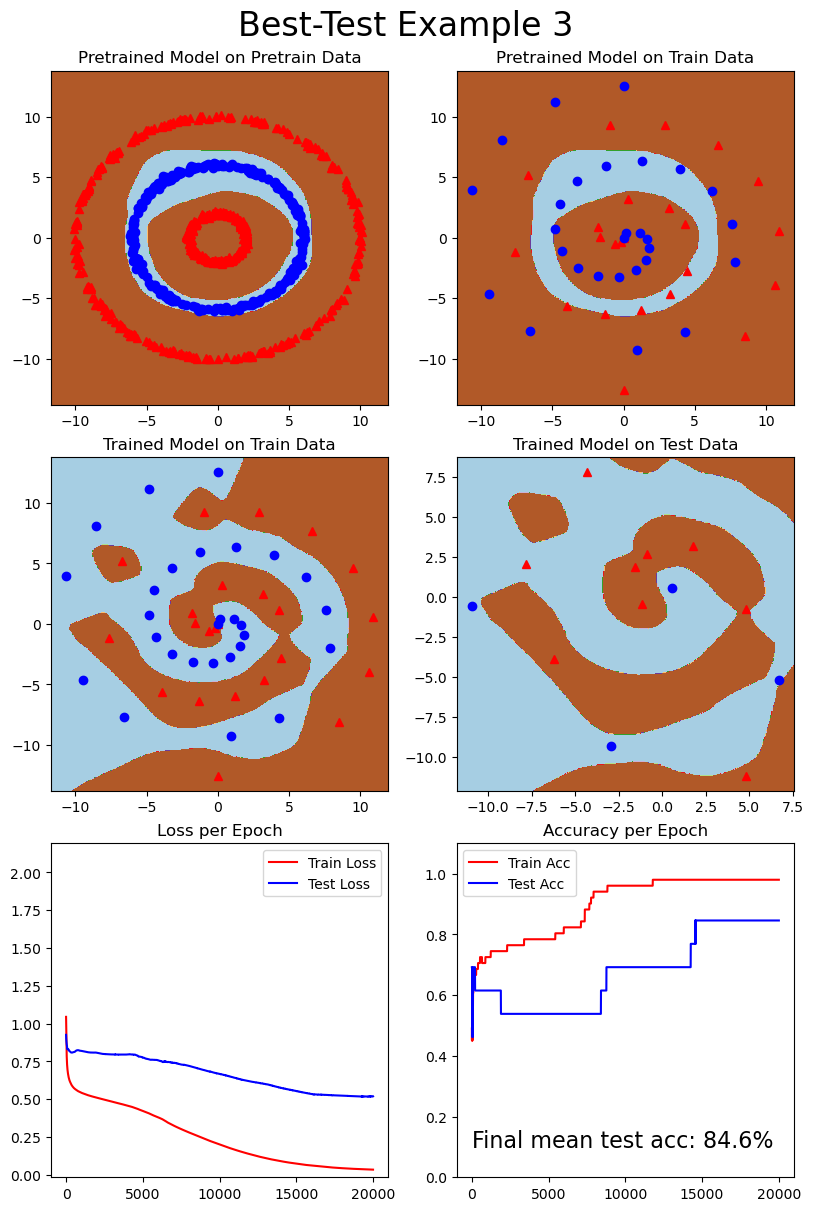

In [122]:
kwargs = {
    "title": "Best-Test Example 3",
    "radii": (2, 6, 10),
    "examples_per_ring": 300,
    "layer_sizes": [200, 100, 10],
    "activation": torch.relu,
    "learning_rate": 0.00001,
    "n_pretrain_epochs": 2000,
    "n_train_epochs": 20000,
}

run_experiment(**kwargs)

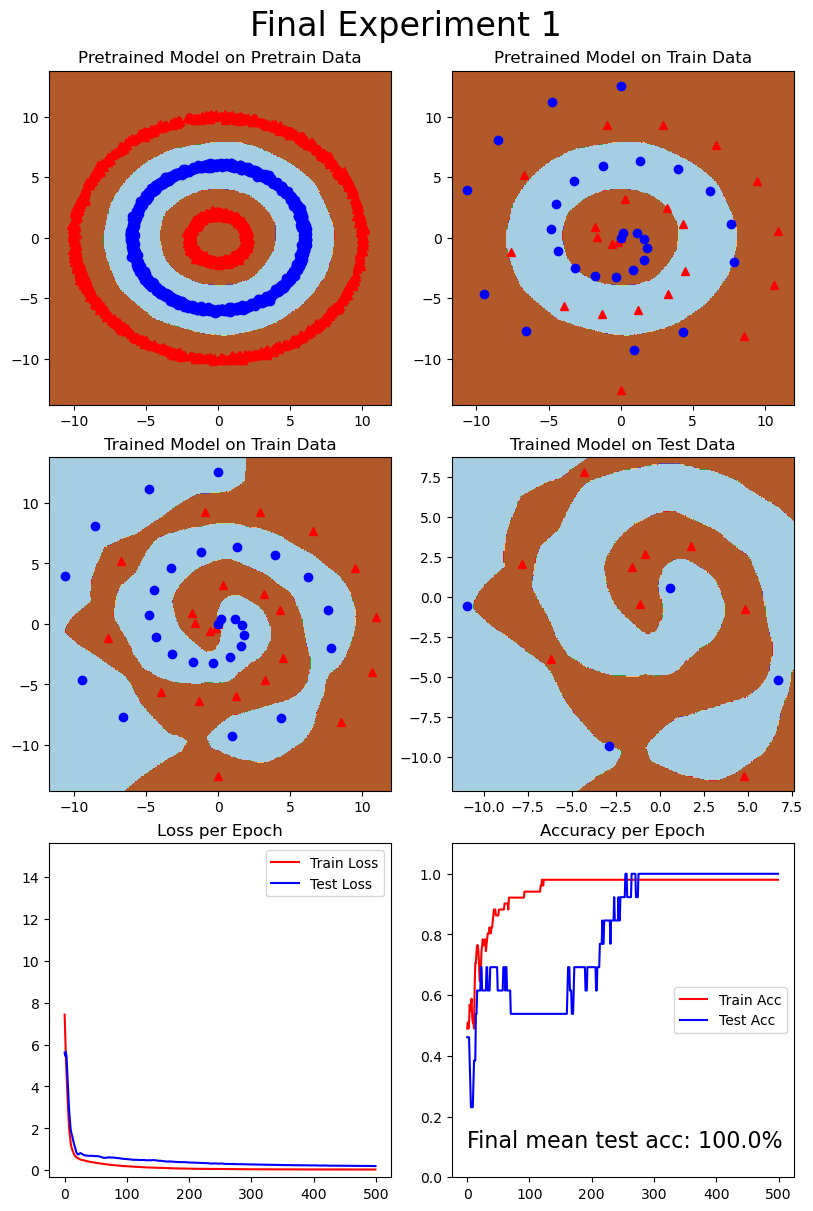

In [27]:
kwargs = {
    "title": "Final Experiment 1",
    "radii": (2, 6, 10),
    "examples_per_ring": 1000,
    "layer_sizes": [100, 50, 10],
    "activation": torch.relu,
    "learning_rate": 0.001,
    "n_pretrain_epochs": 10000,
    "n_train_epochs": 500,
}
run_experiment(**kwargs)

## Q2.1 Understanding the Code (2 points)

  1. In the `run_one_epoch` function, the code uses a combination of `where`, `argmax`, and `torch.nn.CrossEntropyLoss`. How do these calculations work with the model's output to compute the loss and accuracy? Why does the model output a real-valued tensor of shape `(N, 2)`?
    You may want to look at the [documentation for the loss function](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html).

.

  2. Read through the `run_experiment`, `pretrain_and_train`, and `plot_results` functions to understand how the figure is being built. In your own words, describe in general what the six panels show. What data is being used in which panels? 

> *Please put your answers to "Understanding the Code" here*
> 
> 1. First torch.where is used to map the values in the labels vector 'y' to classes. In this case to {0,1}. This is essentially necessary for pytorch.CrossEntropyLoss and the way accuracy is being calculated. torch.argmax is used to extract the prediction for each example. By essentially predicting the class that has a higher logit value. Mapping is done based on the index of each logit distribution for each example which makes a row of the output. So if output[i, 0] is greater than output[i, 1] then the model predicts 0 otherwise 1. Then these predicted classes are being compared to binary_targets that were created with torch.where(hence this is the first reason why torch.where was necessary for the computation). A sum is taken over the matching labels and predictions, and its then divided to the total number of examples to calculate accuracy. Finally the loss is calculated by using the output and binary_targets with torch.nn.CrossEntropyLoss(will call it CLE). CLE expects the input to have logit values that not normalized(which what makes the values of output), and it either expects the target values to be probabilities or class indices,(the second reason why torch.where mapping was necessary) classes indices are used here. The reason why output is a real-valued tensor of shape (N, 2) is because there are N examples and 2 classes(the task is binary classification). It is expected that the model outputs logits, which are raw scores used to compute a probability distribution over classes.
>
> 2. The top two panels visualize the decision boundaries of the pre-trained model on the pre-trained and trained data, also displaying the data samples. The data used in the top-left panel is ring-shaped, and the data used in the top-right panel is spiral-shaped. The middle two plots also visualize decision boundaries and data samples like the panels at the top, but this time for the trained model. The panel on the middle-left shows the data points for the train set of the spiral data, and the one on the middle-right shows the data points of the validation set of the spiral data. Both of the panels at the bottom also use the train and validation sets of spiral data. The panel on the bottom-left shows the loss function's behavior relative to the number of epochs for each data set. The panel on the bottom-right has the same setting but displays the change in accuracy. 

## Q2.2 Experiments and Discussion (6 points)

The example experiment we provide has the following keyword arguments:

```
kwargs = {
    "title": "Example Experiment",
    "radii": (2, 6, 10),
    "examples_per_ring": 100,
    "layer_sizes": [100, 10],
    "activation": torch.tanh,
    "learning_rate": 0.001,
    "n_pretrain_epochs": 100,
    "n_train_epochs": 1000,
}
```

For your experiments, you should change these values and rerun `run_experiment(**kwargs)` and track what happens. You can run as many or as few experiments as you want, but they should have unique `title` values (i.e., not "Example Experiment"), and your written answers to the following questions should reference the figures produced by specific experiments. That is, don't say "the model tends to overfit"; say "in my `Example #4` above, we can see that the model is overfitting because ...". You can copy the example experiment we provide into new Code cells, edit the kwargs, and run the cell to save the output to your notebook.

1. **Overfitting Experiments** (2 points)

    Include at least two experiments that show the model overfitting.
    Describe what those experiments show and how you know the model is
    overfitting. What arguments had the most effect on whether your
    model overfits?

> *Please put your "Overfitting Experiments" answer here*
>
> I conducted three experiments to showcase overfitting in models: 1) "Increasing the width and depth of the model", 2) "Increasing the number of training epochs", and 3) "Increasing the width, depth, and the number of training epochs".
>
> I initially observed that the model was already overfitting with the given parameters in the baseline example. This was evident because the training loss was nearly 0 by the end of the training, while the loss on the test set continued to increase. To exacerbate the overfitting, I decided to increase the complexity of the model by expanding its width and depth. As expected, this change led to even worse performance on the test set, with a final test loss around 4 compared to 2.5 in the baseline. The model also memorized the training set much faster than in the baseline experiment.
> 
> Next, I explored another way to increase overfitting by raising the number of training epochs. I hypothesized that the model would become excessively tuned to the training data. The results confirmed my hypothesis; by the end of training, the test loss had increased to around 6.
>
> In the final experiment, I combined a more complex model with a larger number of epochs, anticipating that this would result in an even more severe overfit. The results aligned with my expectations: the test loss reached approximately 7.5 by the end of training. I observed an interesting phenomenon: increasing the model's complexity alone raised the loss by about 1.5 compared to the baseline, while increasing the number of epochs alone raised it by 3.5. In the combined setting, the test loss was around 5 points higher than in the baseline, which is approximately the sum of the individual increases observed in the earlier experiments. This suggests that the combined test exhibits a linear combination effect of the previous factors. 
>
> Analyzing the experiments separately. Increasing the number of epochs lead to a higher loss value, but increasing the complexity of the model had the model memorize the training set faster. 



2. **Pretraining Experiments** (2 points)

    The point of pretraining is to get the model "started" with an easier task (rings) so it can more quickly learn the task we care about (spirals). You can control the amount of ring data, the amount of spiral data, and the number of epochs the model train on each. In your experiments, assume that all we care about is maximizing the final mean test set accuracy.

    Based on your experiments, **when does pretraining help? When does it hurt?**

    Your answer should be at least two paragraphs and reference at least three different experiments you ran.

> *Please put your "Pretraining Experiments" answer here*
>
> In the first experiment (pre-training experiment 1), I focused solely on increasing the number of examples per ring data. This adjustment did not improve accuracy at all. The likely reason is that the number of pre-training epochs was insufficient for the model to effectively capture the circular behavior in the ring data, as observed in the top panel visualizations.
>
> In the second experiment, I reset the number of examples per ring data to 100 and increased the number of pre-training epochs to 500. However, this did not yield significant improvements either. The model seemed to either overfit to the spiral data due to the relatively high number of training epochs, or the opposite: it did not have enough training to merge the circular behavior learned from the ring data into adapting to the spiral pattern. In my third experiment, I plan to adjust the number of training epochs while ensuring that the model correctly captures the circular pattern in the ring data during pre-training.
>
> I conducted a series of experiments using a wide range of training epochs (from 2 to 40,000) while keeping the number of pre-training epochs at 500 and the examples per ring data at 100. Despite these variations, I was not able to get the model to fully learn the behavior of the spiral data. When the number of training epochs was too large, the model tended to memorize the spiral data, and when it was too small, it failed to transition from the ring pattern to the spiral pattern. I suspect that the issue may be due to a high learning rate, which could cause the model to overfit on the initial data before adapting to the spiral pattern. I plan to experiment with different learning rates to refine the results while trying to produce the best experiment.
>
> Overall, I did not observe any clear benefits of pre-training by solely adjusting the pre-training epochs, training epochs, and the number of examples per ring data. However, I developed an intuition that pre-training should be beneficial when the behavior of the pre-training data closely resembles the behavior of the training data. In contrast, it may be detrimental when pre-training data patterns lead to rapid overfitting.




3. **Best Experiment** (2 points)

    Across all the experiments you ran, with which arguments did you achieve the highest "Final mean test acc"? What patterns led you to find these arguments? Which arguments had the largest impact on your experimental results? What was more difficult than you expected?

    Your answer should be at least two paragraphs and reference at least three different experiments you ran. At least two of these experiments must be different from those included in **Pretraining Experiments** above.

> *Please put your "Best Experiment" answer here*
> 
> While experimenting with various combinations of hyperparameters, I recalled Zach mentioning during a lecture that one of the most impactful parameters to adjust for influencing model behavior is the learning rate. Since I suspected the model was overfitting, I thought it might be beneficial to decrease the learning rate. I tested multiple combinations, and, quite interestingly, while experimenting, I decided to change the activation function to relu. This change unexpectedly resulted in an accuracy rate of around 69% (see Best Experiment), which didn’t appear to be random. Upon reviewing the visualizations, it seemed that the model was successfully capturing the spiral pattern in the data. I realized this could be a promising combination of hyperparameters, so I focused on refining this setup further.
>
> After making several additional adjustments, I observed that increasing the number of training epochs led to further improvements in the model's performance. I tested different increments, and up to 20,000 training epochs, the model continued to improve, eventually reaching an accuracy of around 85% (see Best Experiment 3). However, beyond 20,000 epochs, the model started to overfit, as indicated by the increasing test loss.
> 
> Overall, the three most influential factors were the learning rate, the number of epochs, and the choice of activation function.
>
> I have to admit that the increase in accuracy initially felt serendipitous when I decided to switch the activation function. The model suddenly showed promise, but whenever I tried to rationalize and build intuition by analyzing the visualizations, any subsequent changes I made did not consistently improve accuracy. It became evident that achieving meaningful improvements depended on fine-tuning multiple hyperparameters in tandem. For example, when decreasing the learning rate, it was necessary to increase the number of epochs or adjust the data size. Predicting how the model would respond to these changes was complex and often led to many hours of trial and error without significant gains.

## Q2.3 Extensions and Theory (4 points)

1. **Theory of Pretraining** (2 points)

    Find two ML research papers, blog posts, or other written documents that discuss the (theoretical) differences between (a) pretraining, (b) fine-tuning, and (c) transfer learning. Link to those sources here. In your own words (for someone who hasn't taken a course on ML), how would you describe the difference between these three terms?


> *Please put your "Theory of Pretraining" answer here*
> 
> 1 - Reddit - https://www.reddit.com/r/learnmachinelearning/comments/19f04y3/what_is_the_difference_between_pretraining/
> 
> 2 - dev.to - https://dev.to/luxacademy/understanding-the-differences-fine-tuning-vs-transfer-learning-370#:~:text=While%20transfer%20learning%20freezes%20all,are%20suitable%20for%20different%20scenarios.

> The Reddit post discusses the differences between pretraining, fine-tuning, and a concept called instruct-tuning. It mentions that pretraining typically involves very large models trained on vast amounts of data. The discussion focuses mainly on large language models (LLMs). As an example of pretraining, it is noted that the model builds most of its general knowledge and semantic/syntactic understanding during this phase. The goal of fine-tuning is to improve the model’s performance on a specific task rather than expanding its general knowledge. 
> 
> The second article, from the Dev community, examines the differences between fine-tuning and transfer learning. The article suggests that fine-tuning and transfer learning are conceptually similar because they both involve leveraging an existing pretrained model to improve performance on a specific task. However, they differ in terms of how the pretrained model adapts to the new task. According to the article, transfer learning is suitable when the pretrained model can easily adapt to the new task and there is limited data available. In contrast, fine-tuning is a more resource-intensive process that significantly alters the pretrained model and requires more data. It is suitable for tasks that the pretrained model cannot easily adapt to without substantial changes.
>



2. **Theory versus Practice** (2 points)

    Reflecting on the sources from the previous question, how do the theoretical pros and cons of pretraining line up with your experimental results from the rest of this assignment? Try to be as specific as possible -- are there claims from your sources that are either supported or refuted by your experimental results? If not, propose how you might expand your experiments to better test a hypothesis from a source you cited.

> *Please put your "Theory versus Practice" answer here*
>
> After reading the articles, I gained a deeper understanding of the concept. Initially, I believed that the primary purpose of pretraining was merely to initialize the model, with most of the learning happening during the training phase. However, I now understand that the goal of pretraining is much more significant. It is expected that a substantial portion of the model’s learning will take place during the pretraining phase, rather than just initializing the weights. 

> Reflecting on this new conceptual understanding, I realized that in almost all of my previous experiments, I set the training epochs to be significantly larger than the pretraining epochs. To test the hypothesis that "a significant part of learning occurs during pretraining," I plan to run a new set of experiment(s), code-named "Final."


> In my final experiment, designed to validate this hypothesis, I adjusted the hyperparameters based on empirical evidence from my previous experiments (code-named "Best") and incorporated the theoretical insight that most learning should happen in the pretraining stage. Specifically, I used the 'relu' activation function and increased the model's depth by adding an intermediate layer of size 50 between layers sized 100 and 10. To further test the hypothesis, I increased the number of training examples per ring to 1,000 and set the pretraining epoch size to 10,000, while reducing the training epoch size to 500.

> I was both surprised and satisfied to observe that this configuration resulted in achieving 100% accuracy (see Final Experiment 1), which strongly supports the hypothesis derived from the articles I read.

